In [6]:
import csv
import pandas as pd
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from datetime import datetime

csv.register_dialect(
    'myDialect',
    delimiter = ';',
    lineterminator = '\r\n',
    skipinitialspace = False,
    quotechar = '"'
)

def readFile(fileName):
    filecsv=[]
    with open(fileName) as csvfile:
        filereader = csv.reader(csvfile, dialect='myDialect')
        for row in filereader:
            if row[25] != '':
                filecsv.append(row)
            #print(row)
        filecsv.pop(0)
    return filecsv

def makeDic(file):
    keys = ""
    dFilms = {}
    keys = ''.join(file[0])
    keys = keys.split(';')
    file.pop(0)
    for i in range(len(file)):
        values = ''.join(file[i])
        values = values.split(';')
        #print values[1]
        for a, b in zip(keys, values):
            if '\xc2' in b:
                b = b[:b.rfind('\xc2')]
            if a in dFilms:
                dFilms[a] = dFilms[a] + '", "' + b
            else:                
                dFilms[a] =  b
            #print a + '\t' + b
    #print keys
        #print values
    return dFilms

def makeList(string):
    list = []
    list = ''.join(string)
    list = list.replace('"','').split(',')
    return list

def createDataSet(filename):
    return pd.read_csv(filename, sep=';', error_bad_lines=False, encoding='utf8')

file = readFile('movie_metadata.csv')
##print file[0]
#dic = makeDic(file)
##print dic
#directors = dic['director_name']
##print directors
#titles = makeList(dic['movie_title']) 
##print titles[1]
#actors1 = dic['actor_1_name']
##print actors1
#ratings = dic['imdb_score']
##print score
#movielikes = dic['movie_facebook_likes']
##print likes

dataset = createDataSet('movie_metadata.csv')

ImportError: No module named 'pyspark'

In [5]:
#?getTitleDir
#!dir

dataset

NameError: name 'dataset' is not defined

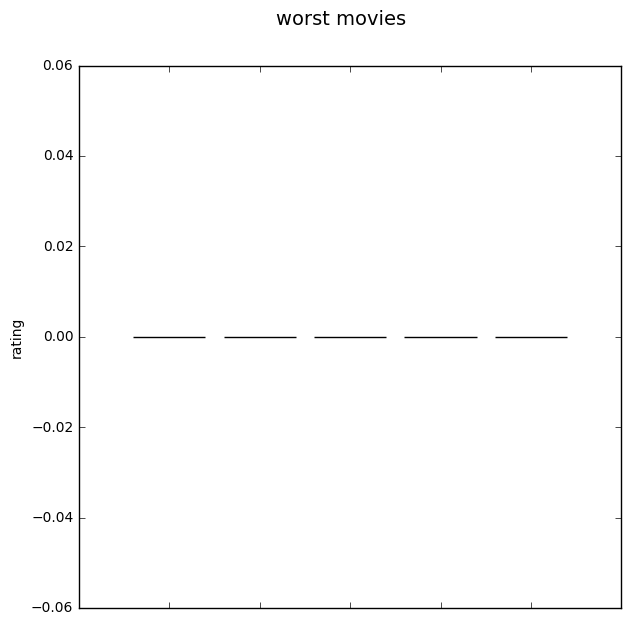

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

title = 11
imdbscore = 25
movielikes = 27
titles = ['']

x_axis = [i+1 for i in range(5)]
y_axis = []
sortedfile = sorted(file, key=lambda file: file[imdbscore])
worstmovies = []

for i in range(5):
    worstmovies.append(sortedfile[i])

#sortedfile = sorted(worstmovies, key=lambda worstmovies: worstmovies[movielikes])
    
for i in range(5):
    try:
        var1 = worstmovies[i][imdbscore]
        titles.append(worstmovies[i][title].decode("utf8"))
        y_axis.append(var1)
    except:
        y_axis.append(0)

fig = plt.figure(figsize=(7, 7))
fig.suptitle('worst movies', fontsize=14)
ax = fig.add_subplot(111)
ax.set_xlabel('')
ax.set_ylabel('rating')
ax.bar(x_axis, y_axis, fc='darksalmon', align='center')
ax.set_xticklabels((titles), rotation=45)
plt.show()

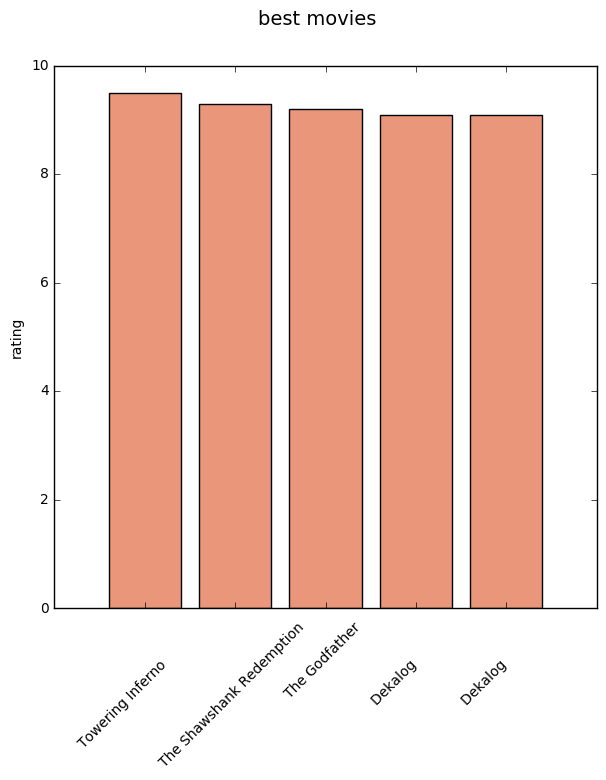

In [134]:
x_axis = [i+1 for i in range(5)]
y_axis = []
sortfile = sorted(file, key=lambda file: file[imdbscore], reverse=True)
bestmovies = []
titles = ['']

for i in range(5):
    bestmovies.append(sortfile[i])

#sortedfile = sorted(worstmovies, key=lambda worstmovies: worstmovies[movielikes])
    
for i in range(5):
    try:
        var1 = bestmovies[i][imdbscore]
        titles.append(bestmovies[i][title].decode("utf8"))
        y_axis.append(var1)
    except:
        y_axis.append(0)

fig = plt.figure(figsize=(7, 7))
fig.suptitle('best movies', fontsize=14)
ax = fig.add_subplot(111)
ax.set_xlabel('')
ax.set_ylabel('rating')
ax.bar(x_axis, y_axis, fc='darksalmon', align='center')
ax.set_xticklabels((titles), rotation=45)
plt.show()

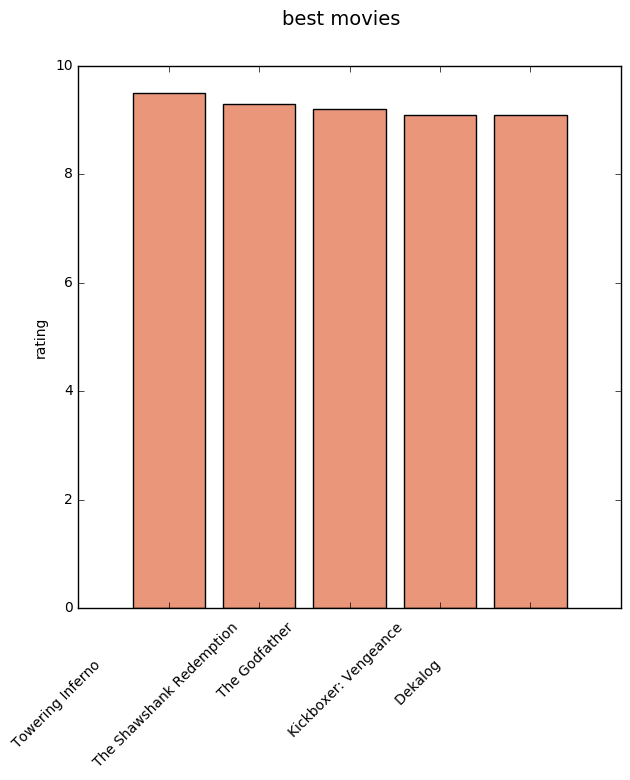

In [5]:
x_axis = [i+1 for i in range(5)]
y_axis = []
bestmovies = ['']

bestmovies = dataset.sort_values(by='imdb_score', ascending=False).head(5);

for i in range(5):
    try:
        var1 = bestmovies.iloc[i]['imdb_score']
        y_axis.append(var1)
    except:
        y_axis.append(0)

fig = plt.figure(figsize=(7, 7))
fig.suptitle('best movies', fontsize=14)
ax = fig.add_subplot(111)
ax.set_xlabel('')
ax.set_ylabel('rating')
ax.bar(x_axis, y_axis, fc='darksalmon', align='center')

ax.set_xticklabels((bestmovies['movie_title']), rotation=45)
plt.show()